<a href="https://colab.research.google.com/github/Naresh-Kamargiri/Machine-Learning-Hotel-Reservation/blob/main/Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#************** **Hotel Reservations** **************





**Context**
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

**Objective**: Predicting Customer Reservation Honoring or Cancellation

The objective of this project is to develop a predictive model that can accurately determine whether a customer will honor or cancel their reservation. This prediction will be based on historical data collected from previous reservations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv('Hotel Reservations.csv')

In [ ]:
#Data Exploration
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


* Here is the top 5 rows of the Data.

In [ ]:
df.shape

(36275, 19)

* Overall we have 36275 rows and 19 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* Info will give us Dtype, number of rows, number of columns and null values we have in the table.

# Lets check the columns we have

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

* Columns attributes gives us detail name of the columns which we have with us.

In [ ]:
df.dtypes #data type

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

* Dtype indicates the every column with the specific DataType.

## Creating function for booking_status columns

In [ ]:
def lel(inp):
    if inp == 'Not_Canceled' :
        return '1'

    else:
        return '0'

In [ ]:
df['booking_status_new']=df['booking_status'].apply(lel)

In [ ]:
df['booking_status_new'] = df['booking_status_new'].astype('int')

* drop-booking_status and converting to Integer type.

In [ ]:
df=df.drop(['booking_status'], axis=1)

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status_new                        int64
dtype: object

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_new
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


## Data Cleansing

In [ ]:
df.isnull()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_new
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status_new                      0
dtype: int64

* This will give us the Number of null values.

In [ ]:
# unique values
df.apply(lambda x: len(x.unique()))

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status_new                          2
dtype: int64

In [ ]:
df.duplicated().sum()

0

* We dont have Duplicates in the Data.

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_new
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


* Describe will gives us the statistical values of each and every column.

## EDA (Exploratory Data Analysis)

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status_new'],
      dtype='object')

In [ ]:
df.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_new
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1


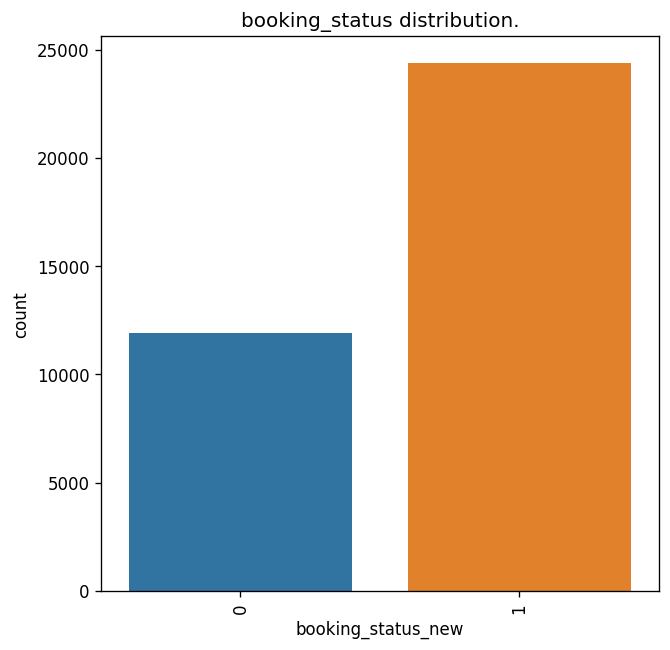

In [ ]:
# Outlet_Establishment
plt.figure(figsize=(6,6), dpi=120)
sns.countplot(x='booking_status_new', data=df)
plt.xticks(rotation=90)
plt.title('booking_status distribution.')
plt.show()

* we have plot the countplot of booking_status_new to know it statistical type.

<Axes: xlabel='no_of_special_requests', ylabel='booking_status_new'>

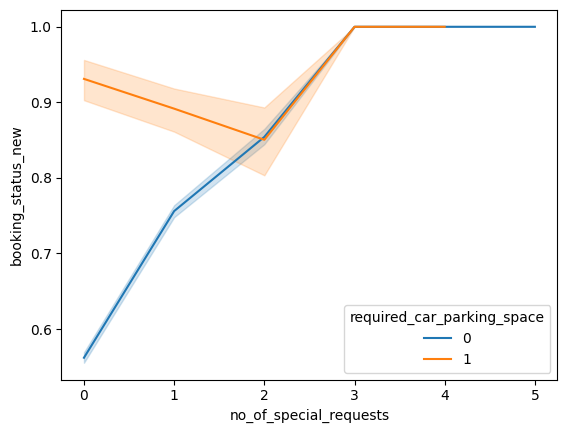

In [ ]:
sns.lineplot(x='no_of_special_requests', y='booking_status_new', data=df , hue='required_car_parking_space')

* we have plot the lineplot by taking x-no_of_special_requests and y-booking_status_new to know it statistical type.

## #Dummies for categorical columns

In [ ]:
df.head(1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_new
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0,0,1


In [ ]:
df.shape

(36275, 19)

In [ ]:
df = pd.get_dummies(df, columns = ['type_of_meal_plan','market_segment_type','room_type_reserved'],drop_first=True)

* col= ['type_of_meal_plan' , 'arrival_year' , 'market_segment_type' , 'room_type_reserved']

In [ ]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0,0,1,0,0,0,0,0,0,0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0,0,0,1,0,0,0,0,0,0
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0,0,0,1,0,0,0,0,0,0
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0,0,0,1,0,0,0,0,0,0
4,INN00005,2,0,1,1,0,48,2018,4,11,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,85,2018,8,3,...,0,0,0,1,0,0,1,0,0,0
36271,INN36272,2,0,1,3,0,228,2018,10,17,...,0,0,0,1,0,0,0,0,0,0
36272,INN36273,2,0,2,6,0,148,2018,7,1,...,0,0,0,1,0,0,0,0,0,0
36273,INN36274,2,0,0,3,0,63,2018,4,21,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.shape

(36275, 29)

## Feature engineering

## creating Total person column by adding no.of.adults + no.of.childrens

In [ ]:
df['Total_Persons']= df['no_of_adults'] + df['no_of_children']

In [ ]:
df=df.drop(['no_of_adults'], axis=1)
df=df.drop(['no_of_children'], axis=1)

In [ ]:
df['Total_Persons']

0        2
1        2
2        1
3        2
4        2
        ..
36270    3
36271    2
36272    2
36273    2
36274    2
Name: Total_Persons, Length: 36275, dtype: int64

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_weekend_nights', 'no_of_week_nights',
       'required_car_parking_space', 'lead_time', 'arrival_year',
       'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status_new',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'Total_Persons'],
      dtype='object')

In [ ]:
df=df.drop(['Booking_ID'], axis=1)
df=df.drop(['lead_time'], axis=1)
df=df.drop(['arrival_month'], axis=1)
df=df.drop(['arrival_date'], axis=1)
df=df.drop(['arrival_year'], axis=1)

* Removing few un-independent variables to target column

In [ ]:
df.shape

(36275, 23)

In [ ]:
df.head(1)

,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_new,type_of_meal_plan_Meal Plan 2,...,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,Total_Persons
0,1,2,0,0,0,0,65.0,0,1,0,...,0,1,0,0,0,0,0,0,0,2


<Axes: >

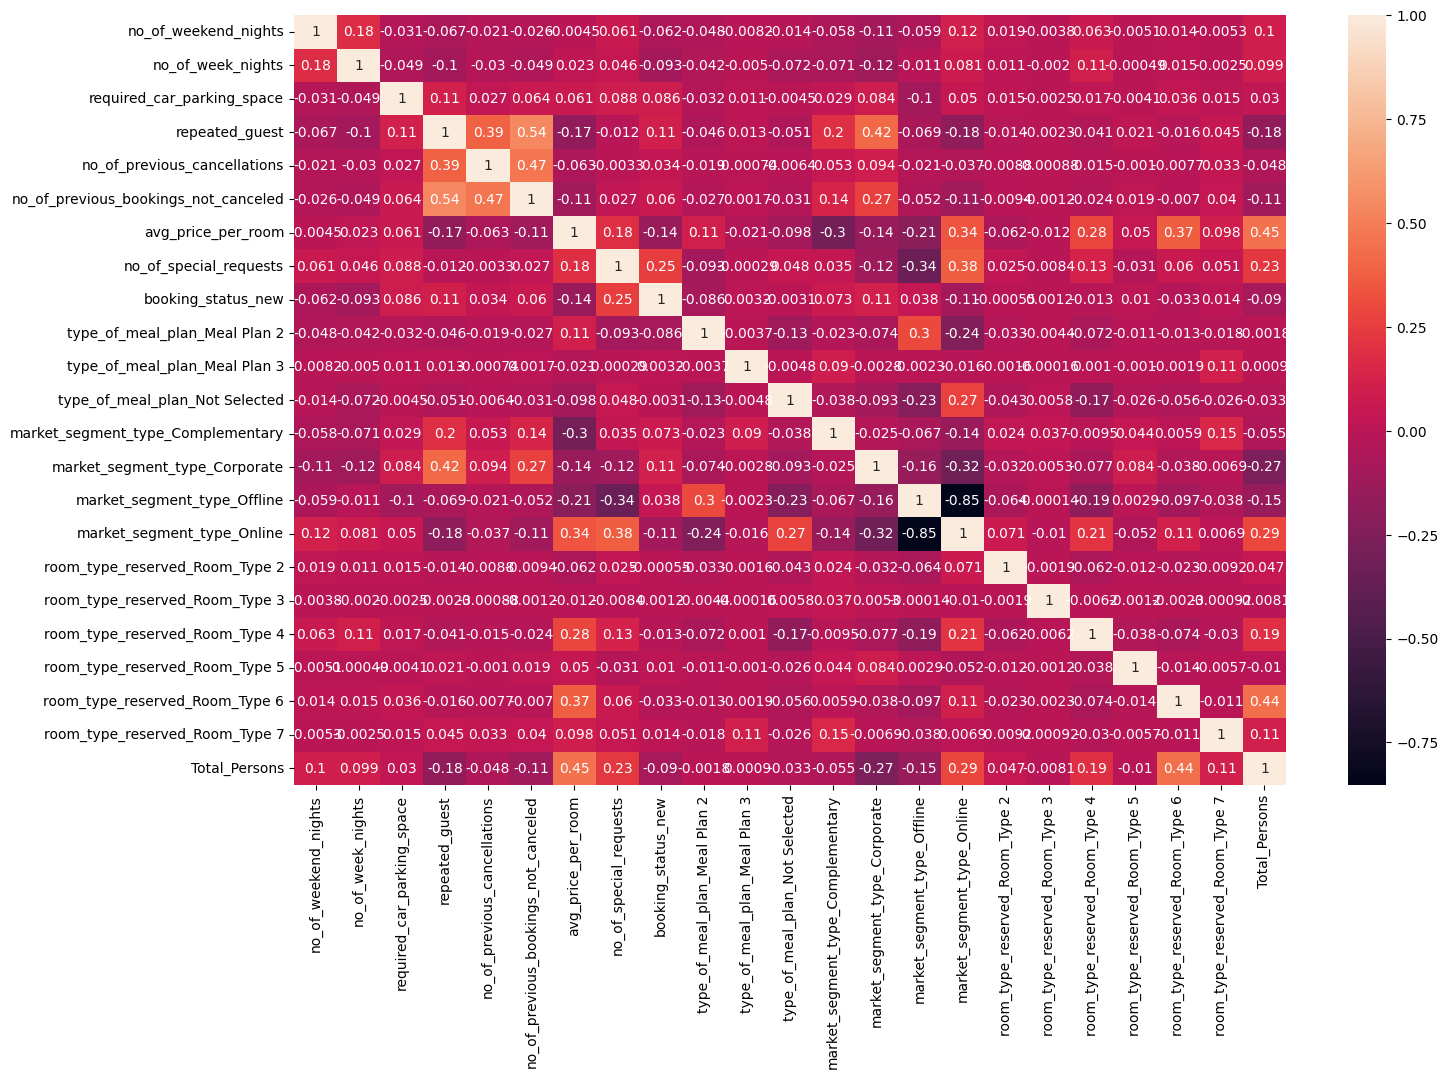

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True )

* Checking the relationship / corr between the target and other variables

In [ ]:
df.columns

Index(['no_of_weekend_nights', 'no_of_week_nights',
       'required_car_parking_space', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status_new',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'Total_Persons'],
      dtype='object')

#Removing Variables which are negatively effect to our target

In [ ]:
df=df.drop(['avg_price_per_room'], axis=1)
df=df.drop(['Total_Persons'], axis=1)
df=df.drop(['no_of_weekend_nights'], axis=1)
df=df.drop(['no_of_week_nights'], axis=1)
df=df.drop(['type_of_meal_plan_Meal Plan 2'], axis=1)
df=df.drop(['market_segment_type_Online'], axis=1)

In [ ]:
df.shape

(36275, 17)

In [ ]:
df.columns

Index(['required_car_parking_space', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'booking_status_new',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7'],
      dtype='object')

In [ ]:
df.dtypes

required_car_parking_space              int64
repeated_guest                          int64
no_of_previous_cancellations            int64
no_of_previous_bookings_not_canceled    int64
no_of_special_requests                  int64
booking_status_new                      int64
type_of_meal_plan_Meal Plan 3           uint8
type_of_meal_plan_Not Selected          uint8
market_segment_type_Complementary       uint8
market_segment_type_Corporate           uint8
market_segment_type_Offline             uint8
room_type_reserved_Room_Type 2          uint8
room_type_reserved_Room_Type 3          uint8
room_type_reserved_Room_Type 4          uint8
room_type_reserved_Room_Type 5          uint8
room_type_reserved_Room_Type 6          uint8
room_type_reserved_Room_Type 7          uint8
dtype: object

#Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
X = df.drop(columns=['booking_status_new'], axis=1)
Y = df['booking_status_new']

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3 , random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create model
LR = LogisticRegression()

In [ ]:
# Fit the model
LR.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
# Predict
Y_train_pred=LR.predict(X_train)
Y_pred = LR.predict(X_test)

In [ ]:
print("Train Data")
print(classification_report(Y_train,Y_train_pred))
print("Test Data")
print(classification_report(Y_test,Y_pred))

Train Data
              precision    recall  f1-score   support

           0       0.61      0.47      0.53      8269
           1       0.77      0.86      0.81     17123

    accuracy                           0.73     25392
   macro avg       0.69      0.66      0.67     25392
weighted avg       0.72      0.73      0.72     25392

Test Data
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      3616
           1       0.77      0.86      0.81      7267

    accuracy                           0.73     10883
   macro avg       0.69      0.67      0.67     10883
weighted avg       0.72      0.73      0.72     10883



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN=KNeighborsClassifier()

In [ ]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
Y_train_pred1=KNN.predict(X_train)
Y_pred1 = KNN.predict(X_test)

In [ ]:
print("Train Data")
print(classification_report(Y_train,Y_train_pred1))
print("Test Data")
print(classification_report(Y_test,Y_pred1))

Train Data
              precision    recall  f1-score   support

           0       0.44      0.32      0.37      8269
           1       0.71      0.81      0.76     17123

    accuracy                           0.65     25392
   macro avg       0.58      0.56      0.56     25392
weighted avg       0.62      0.65      0.63     25392

Test Data
              precision    recall  f1-score   support

           0       0.45      0.32      0.37      3616
           1       0.70      0.81      0.75      7267

    accuracy                           0.64     10883
   macro avg       0.58      0.56      0.56     10883
weighted avg       0.62      0.64      0.63     10883



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC=DecisionTreeClassifier()

In [ ]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred2 = DTC.predict(X_test)
Y_train_pred2=DTC.predict(X_train)

In [ ]:
print("Train Data")
print(classification_report(Y_train,Y_train_pred2))
print("Test Data")
print(classification_report(Y_test,Y_pred2))

Train Data
              precision    recall  f1-score   support

           0       0.62      0.47      0.53      8269
           1       0.77      0.86      0.81     17123

    accuracy                           0.73     25392
   macro avg       0.69      0.66      0.67     25392
weighted avg       0.72      0.73      0.72     25392

Test Data
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      3616
           1       0.77      0.86      0.81      7267

    accuracy                           0.73     10883
   macro avg       0.70      0.67      0.68     10883
weighted avg       0.72      0.73      0.72     10883



In [ ]:
from sklearn import tree

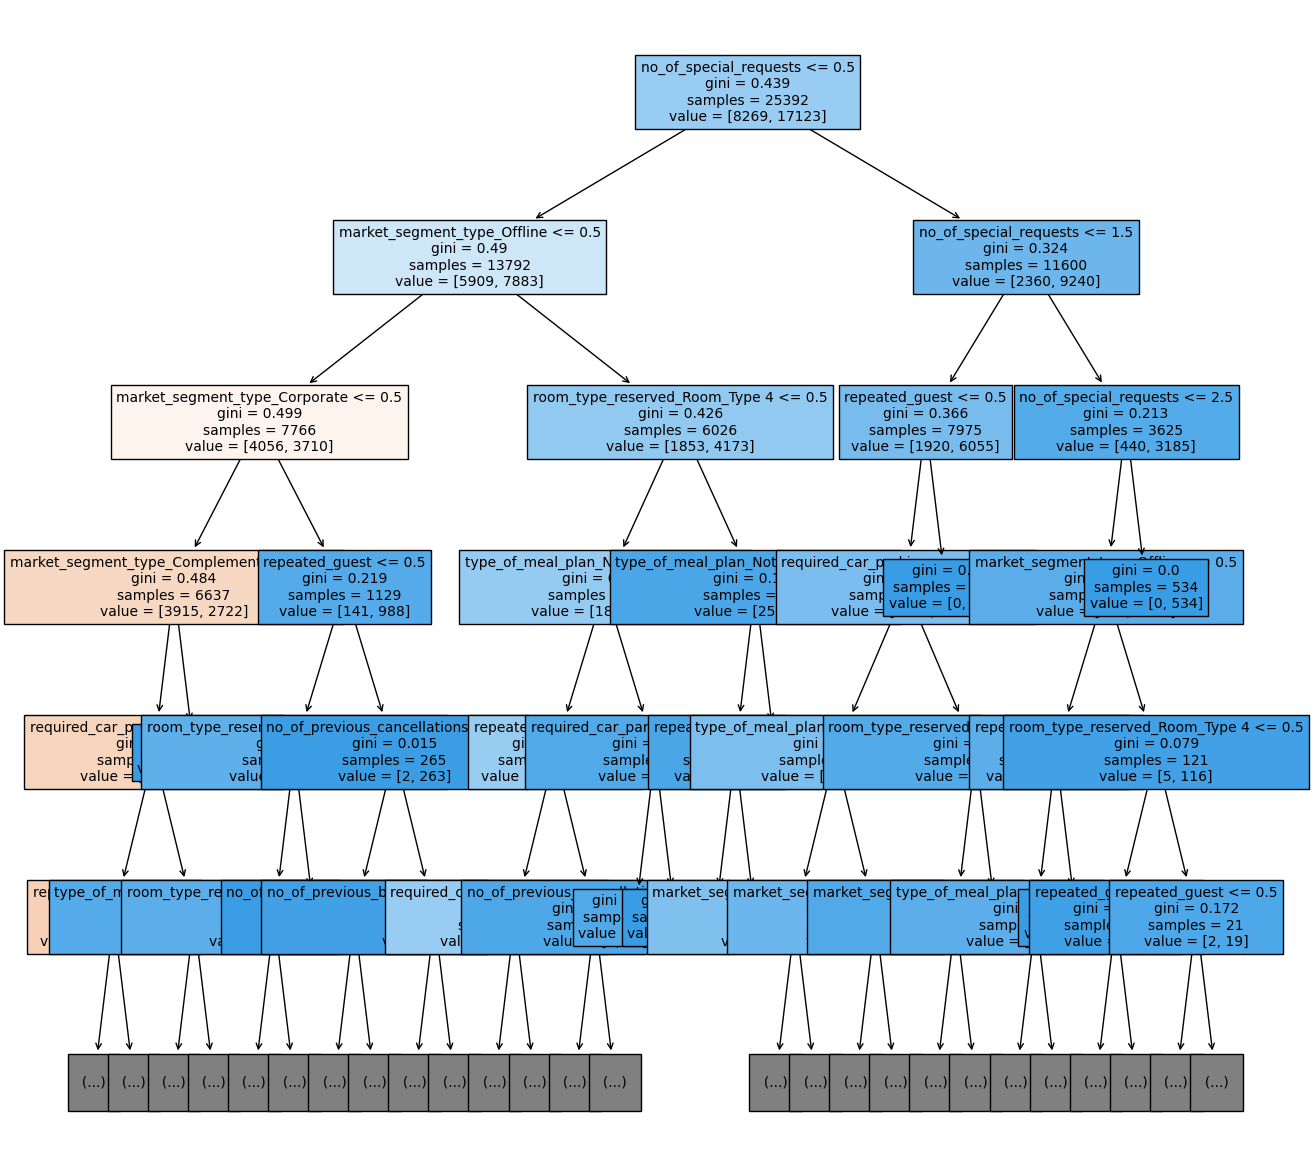

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
chart=tree.plot_tree(DTC,max_depth=5,fontsize=10,feature_names=X.columns,filled=True)

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM=SVC()

In [ ]:
SVM.fit(X_train,Y_train)

SVC()

In [ ]:
Y_train_pred3=SVM.predict(X_train)
Y_pred3 = SVM.predict(X_test)

In [ ]:
print("Train Data")
print(classification_report(Y_train,Y_train_pred3))
print("Test Data")
print(classification_report(Y_test,Y_pred3))

Train Data
              precision    recall  f1-score   support

           0       0.62      0.47      0.53      8269
           1       0.77      0.86      0.81     17123

    accuracy                           0.73     25392
   macro avg       0.69      0.66      0.67     25392
weighted avg       0.72      0.73      0.72     25392

Test Data
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      3616
           1       0.77      0.86      0.81      7267

    accuracy                           0.73     10883
   macro avg       0.70      0.67      0.68     10883
weighted avg       0.72      0.73      0.72     10883



In [ ]:
MOD=["Logistic Regression","K-Neighbor Classifier","Decision Tree","Support Vector Classifier"]
Accuracy_Score_Y_Test=[accuracy_score(Y_test,Y_pred),accuracy_score(Y_test,Y_pred1),accuracy_score(Y_test,Y_pred2),accuracy_score(Y_test,Y_pred3)]
Accuracy_Score_Y_Train=[accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_train,Y_train_pred1),accuracy_score(Y_train,Y_train_pred2),accuracy_score(Y_train,Y_train_pred3)]

* Creating MOD for creating DataFrame

In [ ]:
#MODULES
Modules=pd.DataFrame({
  "Modules":MOD,
  "Train Accuracy Score":Accuracy_Score_Y_Train,
  "Test Accuracy Score":Accuracy_Score_Y_Test
                      })

In [ ]:
Modules

,Modules,Train Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.730624,0.730313
1,K-Neighbor Classifier,0.647881,0.643664
2,Decision Tree,0.732042,0.732151
3,Support Vector Classifier,0.731805,0.731967


* Best model = Decision Tree *